# Data cleaning

In this script we will clean the given datasets, and import them to the local SQLite database.

| atribute           | info                                                                                                                         | source | year |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------- | ------ | ---- |
| tmID               | X                                                                                                                            |  teams | current|
| year               | X                                                                                                                            |  teams | current|
| playoff            |  We have all available --> if it's missing drop the row (team for that year) |  teams | current |
| teamAverageWinRate | If not previous year available look for most recent data, if that's not available then take the total team average win rate. |  teams | -1 |
| numberOfAwardedPlayers | If none are found, default to 0. | awards_players | -1 |
| teamAverageScore | Sum of average score of every player. TBD how to calculate - which atributes. 1st try to get the player data from a team, from last year. Then calculate average for team. 2nd If last year data is not available then look for past years of that player. 3rd  | player_teams | -1 |
| coachWinrate | | Coaches | -1 |





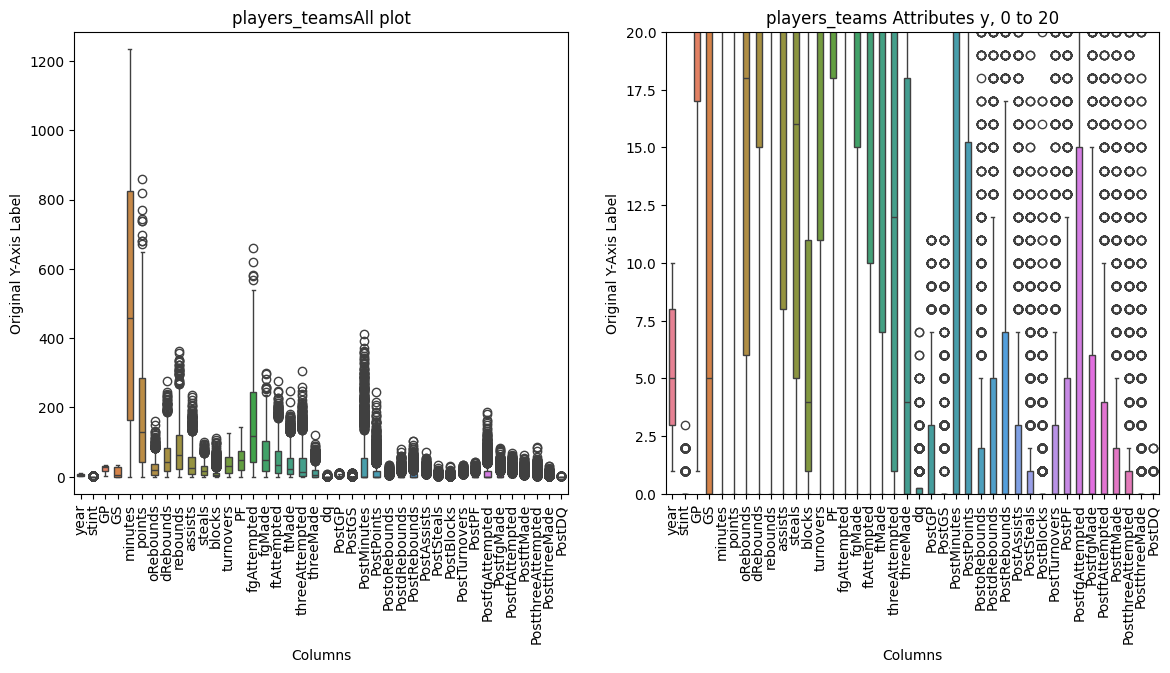

In [7]:
# Create connection layer

import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.row_factory = sqlite3.Row
    except Error as e:
        print(e)

    return conn
        
def delete_all_data(conn):
    cur = conn.cursor()
    print("Deleted ", cur.execute("DELETE FROM coaches").rowcount, " from coaches table.")
    print("Deleted ", cur.execute("DELETE FROM awards_players").rowcount, " from awards_players table.")
    print("Deleted ", cur.execute("DELETE FROM players_teams").rowcount, " from players_teams table.")
    print("Deleted ", cur.execute("DELETE FROM series_post").rowcount, " from series_post table.")
    print("Deleted ", cur.execute("DELETE FROM teams_post").rowcount, " from teams_post table.")
    print("Deleted ", cur.execute("DELETE FROM teams").rowcount, " from teams table.")
    print("Deleted ", cur.execute("DELETE FROM players").rowcount, " from players table.")


database = "./datasets/original/sqlite_database_g79.db"

# create a database connection
conn = create_connection(database)

In [11]:
# Query test
def get_teams(conn):
  cur = conn.cursor()
  cur.execute("SELECT * FROM teams LIMIT 10")
  
  return cur.fetchall()

# --------------------------------------------------------------

allTeams = get_teams(conn)

for i in allTeams:
  print(i["name"])

In [10]:
delete_all_data(conn)

Deleted  162  from coaches table.
Deleted  95  from awards_players table.
Deleted  1876  from players_teams table.
Deleted  70  from series_post table.
Deleted  80  from teams_post table.
Deleted  142  from teams table.
Deleted  893  from players table.


In [12]:
# Close connection 

conn.close()